In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
df =pd.read_csv("/content/TaxiData.csv")

# 3.a Fare and Tip Distribution

## (a) Create histograms and box plots for both fare and tip amounts

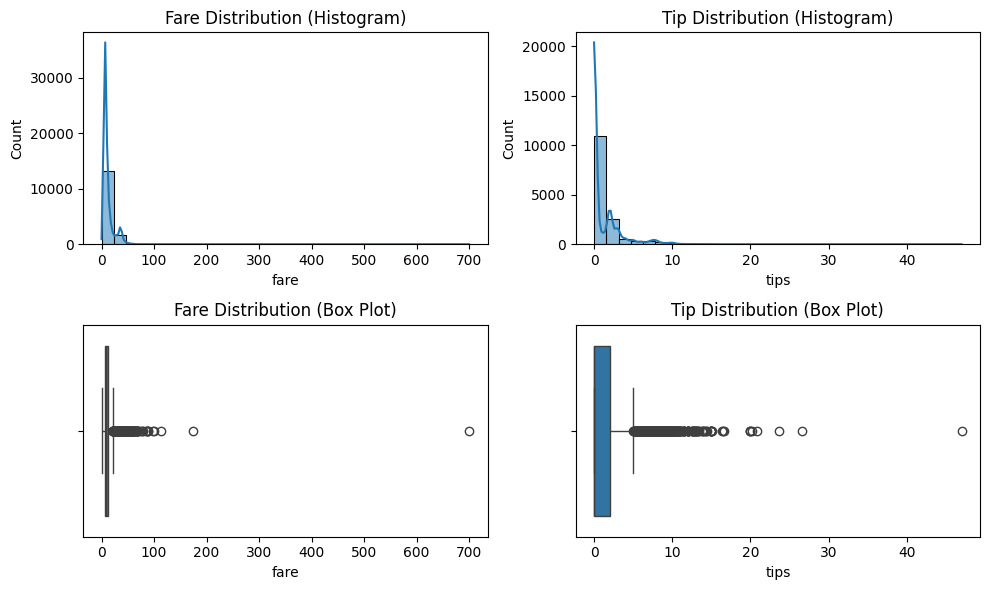

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Histograms for fare and tips
sns.histplot(df['fare'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Fare Distribution (Histogram)")
sns.histplot(df['tips'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Tip Distribution (Histogram)")

# Box plots for fare and tips
sns.boxplot(x=df['fare'], ax=axes[1, 0])
axes[1, 0].set_title("Fare Distribution (Box Plot)")
sns.boxplot(x=df['tips'], ax=axes[1, 1])
axes[1, 1].set_title("Tip Distribution (Box Plot)")

plt.tight_layout()
plt.show()

## (b) Identify the range, outliers, and any clusters in the data

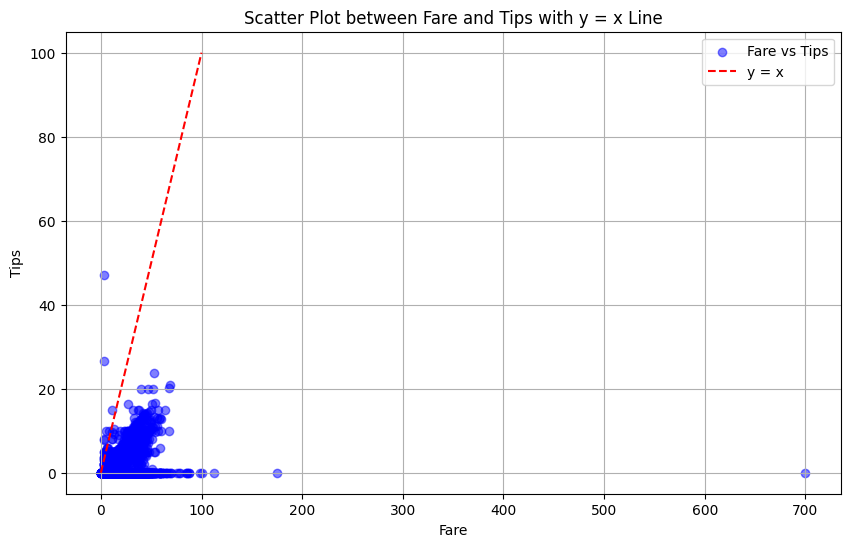

In [26]:
# Scatter plot with y = x line to compare fare and tips
plt.figure(figsize=(10, 6))
plt.scatter(df['fare'], df['tips'], alpha=0.5, color='b', label='Fare vs Tips')
plt.plot([0, 100],
         [0, 100],
         color='r', linestyle='--', label='y = x')
plt.title("Scatter Plot between Fare and Tips with y = x Line")
plt.xlabel("Fare")
plt.ylabel("Tips")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Detecting outliers based on the provided conditions

# Condition 1: Tips are greater than 50% of fare
condition_1 = df['tips'] > 0.5 * df['fare']

# Condition 2: Tips are greater than the 95th percentile (quantile 0.95) of tips
tips_95_quantile = df['tips'].quantile(0.95)
condition_2 = df['tips'] > tips_95_quantile

# Condition 3: Fare is greater than the 95th percentile (quantile 0.95) of fare
fare_95_quantile = df['fare'].quantile(0.95)
condition_3 = df['fare'] > fare_95_quantile

# Applying conditions and counting rows with outliers for each condition
outliers_condition_1 = df[condition_1]
outliers_condition_2 = df[condition_2]
outliers_condition_3 = df[condition_3]

# Display the number of rows satisfying each condition
outlier_counts = {
    "Condition 1 (Tips > 50% of Fare)": len(outliers_condition_1),
    "Condition 2 (Tips > 95th Quantile of Tips)": len(outliers_condition_2),
    "Condition 3 (Fare > 95th Quantile of Fare)": len(outliers_condition_3)
}

outlier_counts


{'Condition 1 (Tips > 50% of Fare)': 230,
 'Condition 2 (Tips > 95th Quantile of Tips)': 749,
 'Condition 3 (Fare > 95th Quantile of Fare)': 730}

**1. Condition 1: Tips > 50% of Fare**

Number of Instances: 230

Interpretation: This condition indicates that in 230 instances, the tip is more than 50% of the fare. This could suggest:

Generous tipping behavior: Customers may be particularly pleased with the service or experience, leading to higher-than-average tips. It could also indicate that the fare is relatively low compared to the tip, which might be the case for short trips or services with a low base fare.

**2. Condition 2: Tips > 95th Quantile of Tips**

Number of Instances: 749

Interpretation: Here, 749 instances of tipping are larger than the 95th percentile of tips. This means these tips are among the top 5% in terms of size, indicating outlier behavior where tips are exceptionally large compared to the majority.

**3. Condition 3: Fare > 95th Quantile of Fare**

Number of Instances: 730

Interpretation: In 730 instances, the fare is higher than the 95th percentile of fares. This suggests that these trips are among the most expensive in terms of fare.

(c) Interpretation: Provide a statistical summary(mean, median, standard deviation,), and analyze any patterns in fare and tipping behavior, such as outliers
or clusters in high or low values

In [28]:
# Statistical summary for fare and tips
fare_summary = df['fare'].describe()
tip_summary = df['tips'].describe()

print("\nFare Statistical Summary:")
print(fare_summary)

print("\nTip Statistical Summary:")
print(tip_summary)

# Calculate mean, median, and standard deviation for fare and tips
average_fare = df['fare'].mean()
median_fare = df['fare'].median()
std_dev_fare = df['fare'].std()

average_tip = df['tips'].mean()
median_tip = df['tips'].median()
std_dev_tip = df['tips'].std()

print(f"\nFare - Mean: {average_fare}, Median: {median_fare}, Standard Deviation: {std_dev_fare}")
print(f"Tip - Mean: {average_tip}, Median: {median_tip}, Standard Deviation: {std_dev_tip}")



Fare Statistical Summary:
count    15002.000000
mean        11.768216
std         11.538850
min          0.000000
25%          5.850000
50%          7.850000
75%         12.450000
max        700.070000
Name: fare, dtype: float64

Tip Statistical Summary:
count    15002.000000
mean         1.076674
std          2.158340
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         47.000000
Name: tips, dtype: float64

Fare - Mean: 11.768216237834956, Median: 7.85, Standard Deviation: 11.538850470753916
Tip - Mean: 1.0766744434075455, Median: 0.0, Standard Deviation: 2.1583404234830343


# 3.b Payment Method Insights

## (a) Visualize the frequency of each payment method using bar charts or pie charts.

<ipython-input-29-e727a24ed339>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')


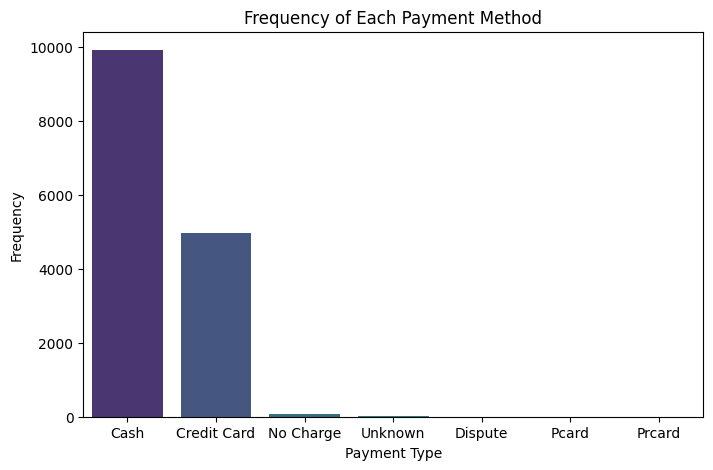

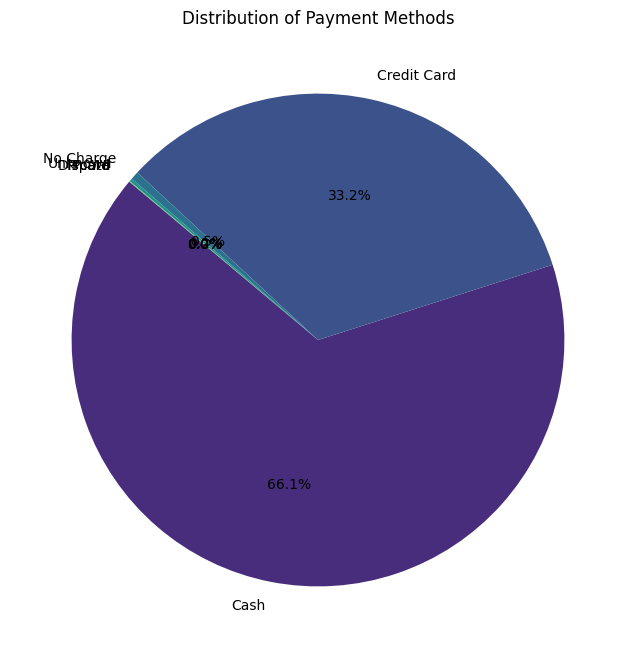

In [29]:
# Count the frequency of each payment type
payment_counts = df['payment_type'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Payment Method')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(payment_counts)))
plt.title('Distribution of Payment Methods')
plt.show()

In [30]:
# Calculate the most frequently used payment method and its count
top_payment_method = payment_counts.idxmax()  # Identifies the dominant payment method
top_payment_count = payment_counts.max()       # Retrieves the transaction count for the dominant method

# Display the result
print(f"Most Used Payment Method: {top_payment_method} with {top_payment_count} transactions.")


Most Used Payment Method: Cash with 9909 transactions.


## (b) Interpretation: Identify any dominant payment methods and discuss how this may impact service providers

#### Most Used Payment Method: Cash with 9909 transactions.

**Loss Prevention**: Cash transactions are harder to track compared to digital
methods, potentially increasing the risk of accounting discrepancies or fraud.

**Staff Training**: Employees may require training on handling cash accurately, counting change, and detecting counterfeit currency, adding to operational complexity.


# 3.c Tips by Payment Method

## (a) Create a box plot to compare tips across different payment methods.

<ipython-input-31-6c7b68169aeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='tips', data=df, palette='Set2')


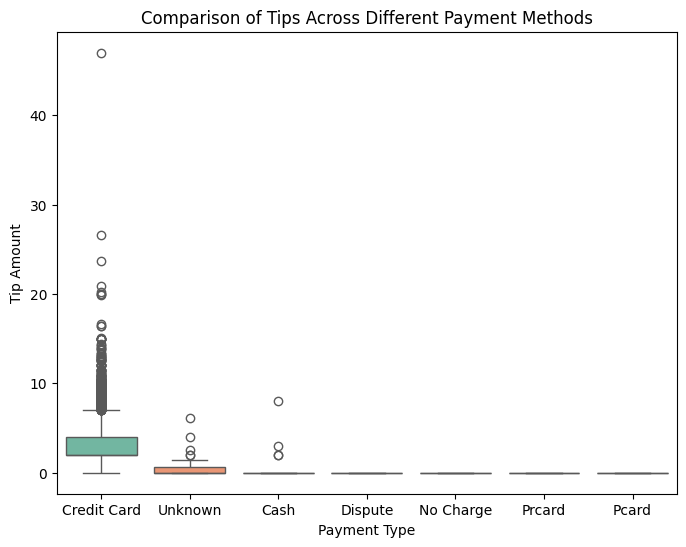

In [31]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_type', y='tips', data=df, palette='Set2')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.title('Comparison of Tips Across Different Payment Methods')
plt.show()

## (b) Interpretation: Summarize the average tipping amounts for each method and analyze variations.

In [32]:
# Calculate the average tip amount for each payment method
average_tips = df.groupby('payment_type')['tips'].mean()
print("Average Tips by Payment Method:")
print(average_tips)

Average Tips by Payment Method:
payment_type
Cash           0.001519
Credit Card    3.239668
Dispute        0.000000
No Charge      0.000000
Pcard          0.000000
Prcard         0.000000
Unknown        0.685172
Name: tips, dtype: float64


# 3.d Fare vs. Distance

## (a) Plot a scatter plot showing the relationship between trip distance and fare

### Plot with better visibilty by removing outliers

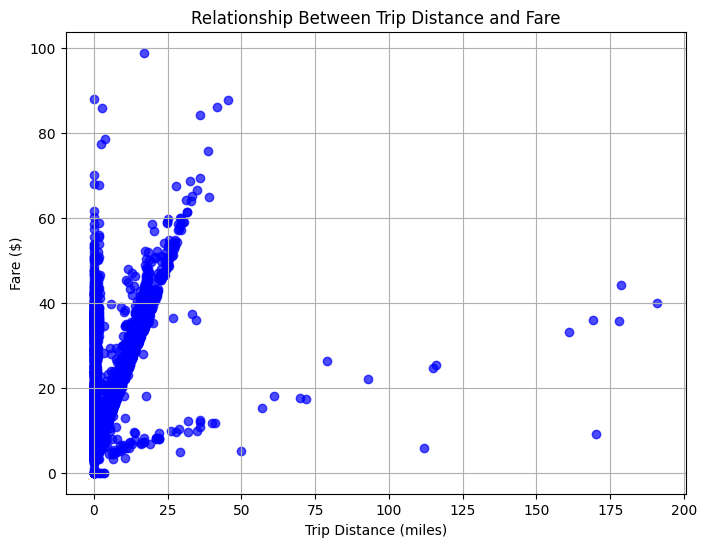

In [33]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df.loc[(df['trip_miles'] < 200)&(df['fare'] < 100), 'trip_miles'], df.loc[(df['trip_miles'] < 200)&(df['fare'] < 100), 'fare'], color='blue', alpha=0.7)

# Adding labels and title
plt.title('Relationship Between Trip Distance and Fare')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare ($)')
plt.grid(True)

# Show plot
plt.show()


## (b) Calculate and interpret the correlation coefficient between the two variables.

In [34]:
# Calculating the correlation coefficient
correlation = df['trip_miles'].corr(df['fare'])

print(f"Correlation coefficient between trip_miles and fare: {correlation}")

Correlation coefficient between trip_miles and fare: 0.22380232969278896


## (c) Interpretation: Explain any findings on the fare-distance relationship and outline any potential implications for fare pricing.

**1. Interpretation of the Correlation**

- **Weak Positive Correlation**: A value of 0.224 means that as the trip distance increases, the fare tends to increase slightly, but the relationship is not very strong. The fare is somewhat influenced by the distance, but other factors seem to play a more significant role in determining the fare.

**2. Reasons for Low Correlation**

There are several reasons why the correlation between `trip_miles` and `fare` might be lower than expected:

- **Other Variables Affecting Fare**: Fares may depend on other factors like time of day, traffic conditions, surge pricing, waiting time, or base fare. These factors could be more influential than distance in some cases.

    - For example, during peak hours, the fare may be higher, even for shorter distances.

**3. Potential Implications for Fare Pricing**

Given that the correlation is weak, you might want to consider the following points:

- **Multifactor Pricing**: If distance is not the only factor determining the fare, a multifactor pricing model might be more appropriate. This would take into account factors like time of day, traffic conditions, demand, and more, rather than relying solely on distance.
